In [230]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.tree import DecisionTreeClassifier
from sklearn.cross_validation import train_test_split
from datetime import datetime

C:\Users\lisa.ryan\AppData\Local\Continuum\Anaconda2\lib\site-packages\ipykernel\__main__.py:25: FutureWarning: order is deprecated, use sort_values(...)


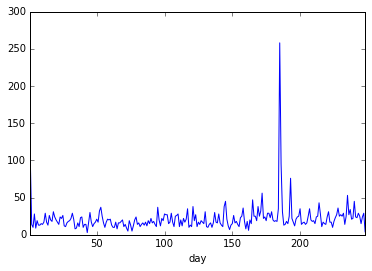

In [168]:
'''
Part 1: UFO
'''
ufo = pd.read_csv('../data/ufo.csv')   # can also read csvs directly from the web!


# 1. change the column names so that each name has no spaces
#           and all lower case
ufo.columns = ['city', 'colors_reported', 'shape_reported', 'state', 'time']
ufo

# 2. Show a bar chart of all shapes reported
#ufo['shape_reported'].value_counts().plot(kind="bar")

# 3. Show a dataframe that only displays the reportings from Utah
ufo[ufo['state'] == 'UT']

# 4. Show a dataframe that only displays the reportings from Texas
ufo[ufo['state'] == 'TX']

# 5. Show a dataframe that only displays the reportings from Utah OR Texas
ufo[(ufo['state'] == 'UT') | (ufo['state'] == 'TX')]

# 6. Which shape is reported most often?
ufo['shape_reported'].value_counts().order().tail(1).index[0]

# 7. Plot number of sightings per day in 2014 (days should be in order!)
ufo['better_date'] = ufo['time'].apply(lambda x: datetime.strptime(x, '%m/%d/%Y %H:%M'))
ufo['year'] = ufo['better_date'].apply(lambda x: x.year)
ufo['day'] = ufo['better_date'].apply(lambda x: x.timetuple().tm_yday)
ufo[ufo['year'] == 2014].groupby('day').day.count().plot()



1.0

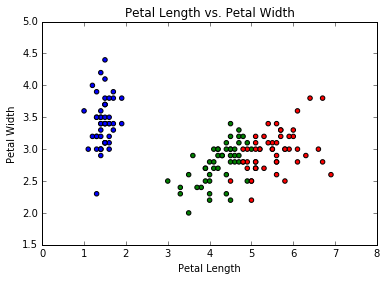

In [277]:
'''
Part 2: IRIS
'''

iris = pd.read_csv('../data/iris.csv')   # can also read csvs directly from the web!

# 1. Show the mean petal length by flower species
iris['petal_length'].groupby(iris['species']).mean()

# 2. Show the mean sepal width by flower species
iris['sepal_width'].groupby(iris['species']).mean()

# 3. Use the groupby to show both #1 and #2 in one dataframe
iris[['species', 'petal_length', 'sepal_width']].groupby('species').mean()

# 4. Create a scatter plot plotting petal length against petal width
#    Use the color_flowers function to specify color
def color_flowers(co):
    if co == 'Iris-setosa':
        color = 'b'
    elif co == 'Iris-virginica':
        color = 'r'
    else:
        color = 'g'
    return color

species_colors = iris['species'].apply(color_flowers)

plt.scatter(iris['petal_length'], iris['sepal_width'], c = species_colors)
plt.title("Petal Length vs. Petal Width")
plt.xlabel("Petal Length")
plt.ylabel("Petal Width")


# 5. Show flowers with sepal length over 5 and petal length under 1.5
iris[(iris['sepal_length'] > 5) & (iris['petal_length'] < 1.5)]

# 6. Show setosa flowers with petal width of exactly 0.2
iris[(iris['petal_width'] == 0.2) & (iris['species'] == 'Iris-setosa')]

# 7. Write a function to predict the species for each observation
#def classify_iris(data):
#    if False:
#        return 'Iris-setosa'
#    elif False:
#        return 'Iris-versicolor'
#    else:
#        return 'Iris-virginica'


train, test = train_test_split(iris, test_size = 0.5)
len(train)
len(test)

def classify_iris(train_data, test_data):
    cols_f = train_data.columns[:4]
    cols_f
    len(cols_f)

    X1 = train_data.as_matrix(cols_f)
    Y1 = train_data.as_matrix(['species']).ravel()

    class_model = DecisionTreeClassifier(min_samples_leaf = 20)
    flower_train = class_model.fit(X1,Y1)
    
    cols_ftest = test_data.columns[:4]
    cols_ftest
    len(cols_ftest)
    
    X1_test = test_data.as_matrix(cols_ftest)
    
    flower_predict = flower_train.predict(X1_test)
    flower_predict_df = pd.DataFrame(flower_predict)
    return flower_predict_df

classification = classify_iris(iris, iris)
classification.columns = ['prediction']

validate = pd.concat([classification, iris['species']], join="inner", axis=1)
validate

len(validate[validate['prediction'] == validate['species']])
len(validate)

len(validate)/float(len(classification))


# example use: 
# classify_iris([0,3,2.1,3.2]) == 'Iris-virginica'
# assume the order is the same as the dataframe, so:
# [sepal_length', 'sepal_width', 'petal_length', 'petal_width']


# make predictions and store as preds
#preds = iris.drop('species', axis=1).apply(classify_iris, axis = 1)


#preds


# test your function: compute accuracy of your prediction
#(preds == iris['species']).sum() / float(iris.shape[0])

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
5,5.4,3.9,1.7,0.4,Iris-setosa
6,4.6,3.4,1.4,0.3,Iris-setosa
7,5.0,3.4,1.5,0.2,Iris-setosa
8,4.4,2.9,1.4,0.2,Iris-setosa
9,4.9,3.1,1.5,0.1,Iris-setosa


In [186]:
species_colors

0      b
1      b
2      b
3      b
4      b
5      b
6      b
7      b
8      b
9      b
10     b
11     b
12     b
13     b
14     b
15     b
16     b
17     b
18     b
19     b
20     b
21     b
22     b
23     b
24     b
25     b
26     b
27     b
28     b
29     b
      ..
120    r
121    r
122    r
123    r
124    r
125    r
126    r
127    r
128    r
129    r
130    r
131    r
132    r
133    r
134    r
135    r
136    r
137    r
138    r
139    r
140    r
141    r
142    r
143    r
144    r
145    r
146    r
147    r
148    r
149    r
Name: species, dtype: object

In [4]:
'''
Part 3: FIFA GOALS
'''

goals = pd.read_csv('../data/fifa_goals.csv')


# 1. Some elements in the minute column have a  '+', remove it and cast each element as an int!

# 2. Show goals scored in the first 5 minutes of a game

# 3. Show goals scored after the regulation 90 minutes is over

# 4. Show the top scoring players

# 5. Show a histogram (distribution) of minutes with 20 bins

# 6. Show a histogram of the number of goals scored by players



In [5]:
# 1. Some elements in the minute column have a  '+', remove it and cast each element as an int!
goals['minute'] = goals['minute'].apply(lambda x:int(x.replace('+','')))
goals.minute.describe()

count    2207.000000
mean       50.905754
std        27.514559
min         1.000000
25%        27.000000
50%        53.000000
75%        75.000000
max       120.000000
Name: minute, dtype: float64

In [6]:
# 2. Show goals scored in the first 5 minutes of a game
goals[goals['minute'] <= 5]

,game_id,minute,player,team1score,team2score
28,6,4,Belis,0,1
62,16,1,Lehner,1,0
73,19,3,Corbatta,0,1
90,23,4,Bozsik,1,0
103,27,4,McParland,0,1
107,28,3,AgÃ¼ero,1,0
112,29,5,Fontaine,0,1
148,40,3,VavÃ¡,1,0
173,50,2,VavÃ¡,1,0
189,52,3,Liedholm,0,1


In [7]:
# 3. Show goals scored after the regulation 90 minutes is over
goals[goals['minute'] > 90]

,game_id,minute,player,team1score,team2score
10,2,93,Schall,2,1
11,2,109,BiÄan,3,1
12,2,118,Verriest [p.],3,2
69,17,95,Schiavio,2,1
156,42,100,McParland,2,1
329,102,92,TrÃ©sor,1,2
330,102,98,Giresse,1,3
331,102,102,Rummenigge,2,3
332,102,108,Fischer,3,3
429,136,101,Hurst,3,2


In [8]:
# 4. Show the top scoring players
#goals.sort_index(by='team1score', inplace=True)
#goals.groupby('player').count()
goals['player'].value_counts()

MÃ¼ller            20
Klose              14
Ronaldo            14
Fontaine           13
PelÃ©              12
Klinsmann          11
Kocsis             11
Lato               10
Rahn               10
Vieri               9
Seeler              9
Rossi               9
Jairzinho           9
Rummenigge          9
Ademir              9
VavÃ¡               9
StÃ¡bile            8
Lineker             8
LeÃ´nidas           8
VÃ¶ller             8
MÃ­guez             8
Cubillas            8
Maradona            8
Szarmach            7
SchÃ¤fer            7
Rep                 7
Rivaldo             7
Tichy               7
Batistuta           6
Careca              6
                   ..
Berdoll             1
CimirotiÄ          1
MÃ©szÃ¶ly [p.]      1
Zuluaga [p.]        1
FlÃ¡vio             1
PetroviÄ [p.]      1
Mujica              1
Larsson [p.]        1
Reinders            1
Vincze              1
Djorkaeff [p.]      1
Isemborghs          1
Ambrois             1
Rusol               1
J. Olsen  

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000000024CAD4A8>]], dtype=object)

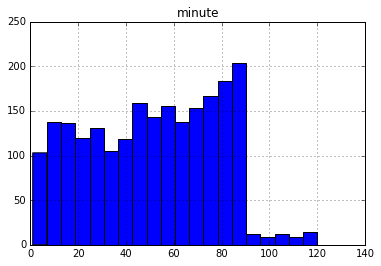

In [252]:
# 5. Show a histogram (distribution) of minutes with 20 bins
goals.hist('minute', bins=20)

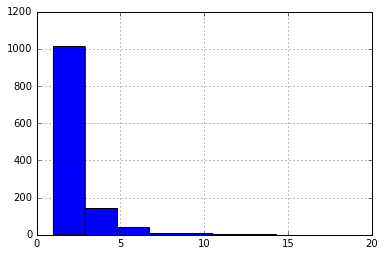

In [253]:
# 6. Show a histogram of the number of goals scored by players
goals['player'].value_counts().hist()